In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import dask.dataframe as dd

In [2]:
from pathlib import Path

AVES_ROOT = Path("/home/anouk/aves")
DATA_PATH = Path("/home/anouk/aves/data/external/censo_2017/")
ZONING_PATH = Path("/home/anouk/Documents/zona777/Zonas777-04-04-2014/Shape/Zonas777_V07_04_2014.shp")

In [3]:
from aves.data.census.analysis import overlay_zoning

Cargamos la zonificación por la cual queremos agrupar las respuestas del censo

In [4]:
zona777 = gpd.read_file(ZONING_PATH)
zona777['zoning_id'] = range(0, len(zona777))
zona777.head()

,geometry,zoning_id
0,"POLYGON ((-70.75950 -33.41237, -70.76014 -33.4...",0
1,"POLYGON ((-70.73929 -33.38999, -70.73667 -33.3...",1
2,"POLYGON ((-70.54357 -33.54802, -70.54293 -33.5...",2
3,"POLYGON ((-70.54357 -33.54802, -70.54519 -33.5...",3
4,"POLYGON ((-70.78731 -33.56483, -70.79797 -33.5...",4


In [5]:
zona777.set_crs(epsg=4674, inplace=True)

,geometry,zoning_id
0,"POLYGON ((-70.75950 -33.41237, -70.76014 -33.4...",0
1,"POLYGON ((-70.73929 -33.38999, -70.73667 -33.3...",1
2,"POLYGON ((-70.54357 -33.54802, -70.54293 -33.5...",2
3,"POLYGON ((-70.54357 -33.54802, -70.54519 -33.5...",3
4,"POLYGON ((-70.78731 -33.56483, -70.79797 -33.5...",4
...,...,...
799,"POLYGON ((-70.75398 -33.36184, -70.74889 -33.3...",799
800,"POLYGON ((-70.74889 -33.36107, -70.74621 -33.3...",800
801,"POLYGON ((-70.74621 -33.36028, -70.74965 -33.3...",801
802,"POLYGON ((-70.73742 -33.35790, -70.73619 -33.3...",802


Obtenemos la intersección de la zonificación censal y nuestra zonificación objetivo, esto puede demorar harto tiempo

In [6]:
intersected_zoning = overlay_zoning(zona777, crs='EPSG:3857')

In [7]:
intersected_zoning.zoning_id.value_counts()

zoning_id
9      30
562    17
56     11
225    10
255    10
       ..
159     1
152     1
452     1
352     1
746     1
Name: count, Length: 803, dtype: int64

In [7]:
intersected_zoning[intersected_zoning.zoning_id==54]

,zoning_id,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,DISTRITO,LOC_ZON,GEOCODIGO,SHAPE_Leng,SHAPE_Area,ID_ZONA_LOC,NOM_LOCALI,area_censo,geometry,area_m2,percentage_overlap
862,54,13,REGIÓN METROPOLITANA DE SANTIAGO,132,CORDILLERA,13201,PUENTE ALTO,PUENTE ALTO,4,6,13201041006,0.078547,0.000111,10977,NaN,1.649538e+06,"POLYGON ((-7851943.883 -3976946.850, -7851889....",1.594196e+06,0.966450
869,54,13,REGIÓN METROPOLITANA DE SANTIAGO,132,CORDILLERA,13202,PIRQUE,PIRQUE,2,1,13202021001,0.126521,0.000168,7046,NaN,2.506333e+06,"MULTIPOLYGON (((-7851447.509 -3977327.413, -78...",1.130155e+05,0.045092
876,54,13,REGIÓN METROPOLITANA DE SANTIAGO,132,CORDILLERA,13201,PUENTE ALTO,PUENTE ALTO,4,5,13201041005,0.020464,0.000022,5504,NaN,3.297779e+05,"POLYGON ((-7853672.259 -3976541.835, -7853678....",3.241676e+05,0.982988
878,54,13,REGIÓN METROPOLITANA DE SANTIAGO,132,CORDILLERA,13201,PUENTE ALTO,PUENTE ALTO,4,3,13201041003,0.026977,0.000042,1922,NaN,6.314867e+05,"POLYGON ((-7854546.755 -3976971.445, -7854240....",2.045639e+05,0.323940
882,54,13,REGIÓN METROPOLITANA DE SANTIAGO,132,CORDILLERA,13201,PUENTE ALTO,PUENTE ALTO,4,4,13201041004,0.031551,0.000036,14687,NaN,5.378298e+05,"POLYGON ((-7854960.641 -3977724.565, -7854695....",1.116429e+05,0.207580
890,54,13,REGIÓN METROPOLITANA DE SANTIAGO,132,CORDILLERA,13201,PUENTE ALTO,PUENTE ALTO,4,1,13201041001,0.045265,0.000095,1615,NaN,1.417157e+06,"POLYGON ((-7856473.473 -3978691.369, -7856445....",5.617083e+05,0.396363
906,54,13,REGIÓN METROPOLITANA DE SANTIAGO,132,CORDILLERA,13201,PUENTE ALTO,PUENTE ALTO,4,7,13201041007,0.049198,0.000061,15822,NaN,9.124256e+05,"POLYGON ((-7854433.087 -3977460.705, -7854392....",9.066533e+05,0.993674
909,54,13,REGIÓN METROPOLITANA DE SANTIAGO,132,CORDILLERA,13202,PIRQUE,NaN,2,10,13202022010,0.055199,0.000150,13598,PIRQUE,2.237896e+06,"POLYGON ((-7853341.499 -3977772.422, -7853397....",1.607619e+05,0.071836


In [9]:
intersected_zoning.head()

,zoning_id,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,DISTRITO,LOC_ZON,GEOCODIGO,SHAPE_Leng,SHAPE_Area,NOM_LOCALI,area_censo,geometry,area_m2,percentage_overlap
4,605,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13103,CERRO NAVIA,CERRO NAVIA,9,3,13103091003,0.065739,0.000163,NaN,2.413262e+06,"POLYGON ((-7878334.395 -3951847.898, -7878434....",2.363617e+06,0.979428
5,0,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13128,RENCA,RENCA,7,5,13128071005,0.093930,0.000171,NaN,2.538199e+06,"POLYGON ((-7876600.666 -3946319.642, -7876599....",5.412023e+05,0.213223
6,1,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13128,RENCA,RENCA,7,5,13128071005,0.093930,0.000171,NaN,2.538199e+06,"POLYGON ((-7874551.941 -3947350.460, -7874551....",1.620634e+06,0.638498
8,225,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13128,RENCA,RENCA,7,5,13128071005,0.093930,0.000171,NaN,2.538199e+06,"MULTIPOLYGON (((-7874863.848 -3947086.726, -78...",1.205672e+05,0.047501
11,795,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13128,RENCA,RENCA,7,5,13128071005,0.093930,0.000171,NaN,2.538199e+06,"MULTIPOLYGON (((-7874147.955 -3948036.589, -78...",1.774502e+05,0.069912


Queremos obtener la distribución de sexo en cada zona, así que llamamos a la función `sex_by_zoning`, pasándole como parámetro la intersección de zonificación y la columna que contiene el identificador único de cada zona.

In [7]:
from aves.data.census.analysis import sex_by_zoning

In [8]:
sex_by_zoning_df = sex_by_zoning(intersected_zoning, "zoning_id")

In [11]:
sex_by_zoning_df[sex_by_zoning_df['zoning_id']==54]

,zoning_id,Hombre_pond,Mujer_pond
54,54,7302.395731,7992.475035


Veamos la tendencia de la población de cada zona

In [29]:
sex_by_zoning_df['diff'] = (sex_by_zoning_df['Mujer'] - sex_by_zoning_df['Hombre']) / sex_by_zoning_df[['Hombre', 'Mujer']].sum(axis=1)
# Now you can plot the 'normalized_difference' colum

/tmp/ipykernel_16126/2768521413.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


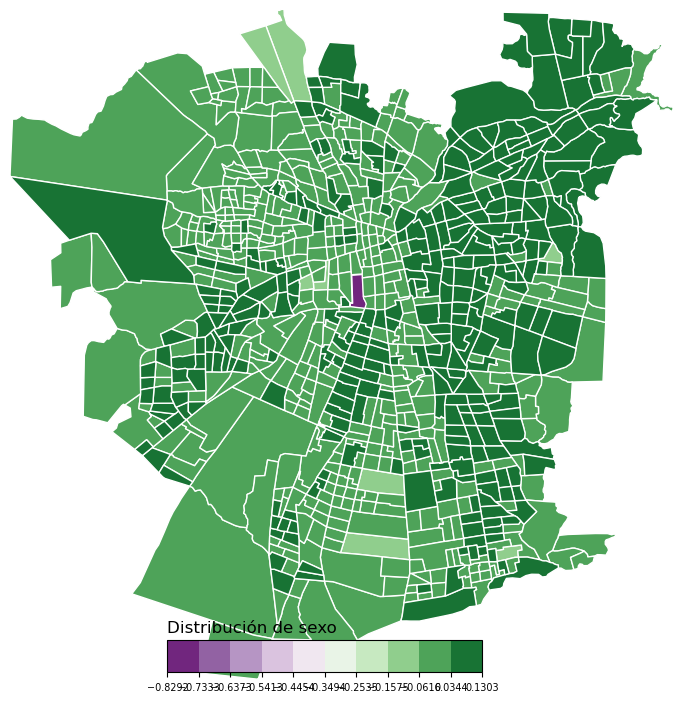

In [31]:
from aves.visualization.figures import figure_from_geodataframe
from aves.visualization.maps import choropleth_map

fig, ax = figure_from_geodataframe(zona777, height=7)

ax, cax = choropleth_map(ax, zona777.merge(sex_by_zoning_df, on="zoning_id", how='inner',), 'diff', palette='PRGn')
cax.set_title('Distribución de sexo', loc='left')
ax.grid(True)
fig.tight_layout()


In [38]:
from aves.data.census.analysis import age_by_zoning

result = age_by_zoning(intersected_zoning, "zoning_id")

In [12]:
result.merge(sex_by_zoning_df, on='zoning_id')

,zoning_id,Menor de edad,Mayor de edad,Adulto mayor,100 años y más,Hombre_pond,Mujer_pond
0,0,2501.497746,4601.595067,139.649900,2.269022,3600.484408,3644.527328
1,1,7153.429534,14091.040070,635.821229,4.896757,10732.848686,11152.338904
2,2,2341.506490,6492.338824,880.022685,1.384225,4657.207617,5058.044606
3,3,831.851495,1723.552040,180.050082,0.000000,1332.270019,1403.183599
4,4,2287.789381,7746.749344,1116.217171,1.792544,5263.520309,5889.028132
...,...,...,...,...,...,...,...
798,799,743.760397,2147.615360,129.249286,0.577006,1549.837415,1471.364634
799,800,4816.541610,12958.598376,992.592441,6.308621,9214.678459,9559.362590
800,801,2621.541251,5930.612214,244.367189,3.626944,4343.971851,4456.175747
801,802,2440.157447,7738.566310,1117.353523,2.566893,5478.837624,5819.806549


In [7]:
from aves.data.census.analysis import inmigrants_by_zoning
inmigrants = inmigrants_by_zoning(intersected_zoning, "zoning_id")

In [8]:
inmigrants

,zoning_id,migrantes
0,0,200.660766
1,1,661.903443
2,2,266.727618
3,3,76.948778
4,4,319.046264
...,...,...
798,799,462.758603
799,800,1647.953374
800,801,628.627275
801,802,600.643519


In [9]:
from aves.data.census.analysis import population_by_zoning

population = population_by_zoning(intersected_zoning, "zoning_id")

In [12]:
population.poblacion.sum()

5696578.588285715

In [15]:
from aves.data.census.analysis import read_zona, read_localidad
censo_zoning_by_region = []
censo_zoning_by_region.append(read_zona(13))
censo_zoning_by_region.append(read_localidad(13))
censo_zoning = pd.concat(censo_zoning_by_region)

In [5]:
from aves.data.census.analysis import read_personas

In [27]:
df = read_personas(columnas=['ID_ZONA_LOC','COMUNA', 'PERSONAN'], filtros=[("REGION", "in", [13])])
agg_count = pd.NamedAgg(column='PERSONAN', aggfunc="count")
reduced_df = df.groupby("COMUNA").agg(poblacion=agg_count)


<Axes: >

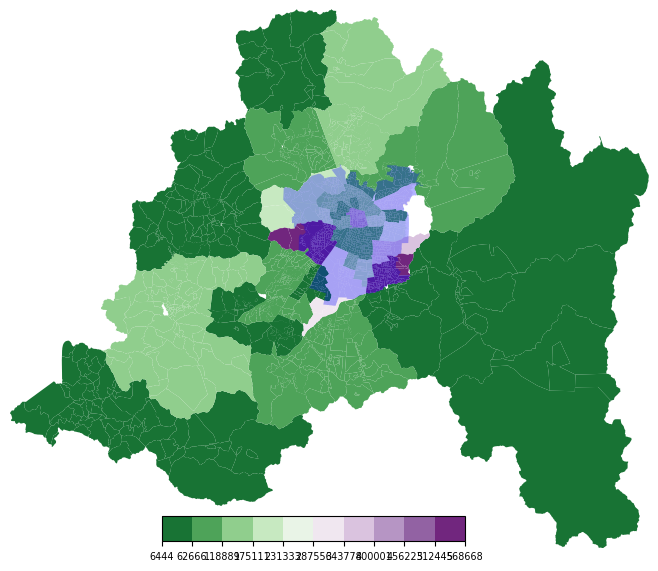

In [35]:
from aves.visualization.figures import figure_from_geodataframe
from aves.visualization.maps import choropleth_map

fig, ax = figure_from_geodataframe(censo_zoning, height=7)
ax, cax = choropleth_map(ax, censo_zoning.merge(reduced_df, on="COMUNA", how='inner',), 'poblacion', palette='PRGn_r', edgecolor=None)
censo_zoning.plot(ax=ax, facecolor='#efefef', edgecolor='white', zorder=0)
zona777.plot(ax=ax, facecolor='blue', edgecolor=None, zorder=1, alpha=0.3)


# Escolaridad
Veamos los años de escolaridad de cada zona

In [7]:
from aves.data.census.analysis import schooling_by_zoning

schooling = schooling_by_zoning(intersected_zoning, "zoning_id", min_age=0)

In [8]:
schooling

,zoning_id,0-5,5-10,10-12,12-15,15-21,promedio
0,0,1979.470588,1285.299678,2305.437993,770.137635,629.062340,9.180087
1,1,5647.898014,5103.224044,7069.955594,1997.053757,1151.306616,8.845663
2,2,1651.823372,1282.790075,2313.679974,1786.648963,2392.979887,11.201685
3,3,555.741174,361.106030,450.628138,382.229224,907.291474,11.283551
4,4,1624.897335,1598.366756,3047.703266,2091.245677,2520.221471,11.374052
...,...,...,...,...,...,...,...
798,799,661.825582,784.150799,1029.378238,215.223141,122.325217,7.040396
799,800,3906.677937,4372.620880,6740.763693,1882.897449,1105.198345,8.468192
800,801,1993.895329,1710.782971,3277.516145,997.151970,563.096023,9.281956
801,802,2183.024884,2444.135383,3664.904705,1481.241048,1168.788840,9.550173


In [28]:
schooling['promedio'] = round(schooling['promedio'], 2)

/tmp/ipykernel_8111/2279354546.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


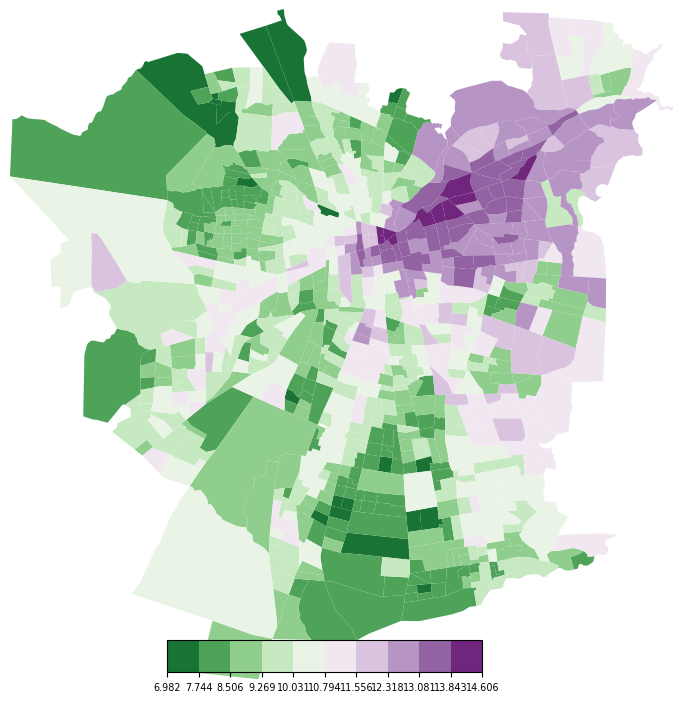

In [11]:
from aves.visualization.figures import figure_from_geodataframe
from aves.visualization.maps import choropleth_map

fig, ax = figure_from_geodataframe(zona777, height=7)
choropleth_map(ax, zona777.merge(schooling, on="zoning_id", how='inner',), 'promedio', palette='PRGn_r', edgecolor=None)

fig.tight_layout()

Si queremos saber la escolaridad de la población adulta, podemos pasarle una edad mínima a la función

In [9]:
schooling_adults = schooling_by_zoning(intersected_zoning, "zoning_id", min_age=18)
schooling_adults

,zoning_id,0-9,9-12,12-16,16-21,promedio
0,0,772.704416,2447.386011,1015.712453,383.487523,12.349814
1,1,3334.021833,7706.671547,2446.442159,701.918215,11.459871
2,2,556.918656,2474.701022,2501.680155,1677.948696,13.702348
3,3,114.668767,451.131071,618.104890,671.415808,14.428029
4,4,793.778459,3304.393772,2925.074848,1686.392300,13.234885
...,...,...,...,...,...,...
798,799,631.244278,1171.898656,264.268628,73.279729,8.288186
799,800,3102.979516,7415.849171,2364.445979,623.649816,10.292200
800,801,967.655101,3503.737410,1243.621804,316.626190,11.788388
801,802,1932.470428,4055.054369,1928.789599,721.240288,11.111504


/tmp/ipykernel_8111/3561906474.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


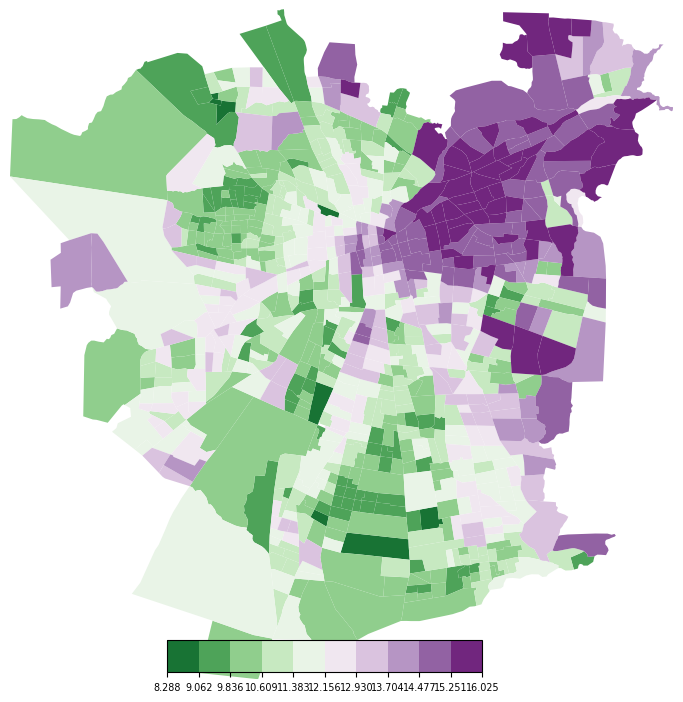

In [12]:
fig, ax = figure_from_geodataframe(zona777, height=7)
choropleth_map(ax, zona777.merge(schooling_adults, on="zoning_id", how='inner',), 'promedio', palette='PRGn_r', edgecolor=None)
fig.tight_layout()

In [18]:
from aves.data.census.loading import read_personas